In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('E:/NewDrive/DataScienceProjects/DataSets/TC/python_test_dataset_flights_6months.csv')

In [50]:
df.head(5)

In [3]:
df.isnull().sum()

buyer_id              0
supplier_id           0
to_airport            0
from_airport          0
journey_type          0
pax                   0
costprice             0
markup                0
selling_price         0
booking_date          0
payment_method        0
refund_status         0
refund_amount         0
channel_of_booking    0
booking_status        0
travel_date           0
cashback              0
coupon_redeem         0
Coupon USed?          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32240 entries, 0 to 32239
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   buyer_id            32240 non-null  int64  
 1   supplier_id         32240 non-null  int64  
 2   to_airport          32240 non-null  object 
 3   from_airport        32240 non-null  object 
 4   journey_type        32240 non-null  object 
 5   pax                 32240 non-null  int64  
 6   costprice           32240 non-null  float64
 7   markup              32240 non-null  float64
 8   selling_price       32240 non-null  float64
 9   booking_date        32240 non-null  object 
 10  payment_method      32240 non-null  object 
 11  refund_status       32240 non-null  object 
 12  refund_amount       32240 non-null  float64
 13  channel_of_booking  32240 non-null  object 
 14  booking_status      32240 non-null  object 
 15  travel_date         32240 non-null  object 
 16  cash

In [8]:
df['costprice'] = df['costprice'].round().astype(int)
df['markup'] = df['markup'].round().astype(int)
df['selling_price'] = df['selling_price'].round().astype(int)
df['refund_amount'] = df['refund_amount'].round().astype(int)
df['cashback'] = df['cashback'].round().astype(int)
df['coupon_redeem'] = df['coupon_redeem'].round().astype(int)
df.columns = df.columns.str.replace('Coupon USed?', 'Coupon Used Status')

In [11]:
top_buyers = df['buyer_id'].value_counts().head(10)
top_suppliers = df['supplier_id'].value_counts().head(3)

In [13]:
top_buyers

buyer_id
92     102
119     91
216     87
444     87
132     86
399     86
50      84
473     84
74      83
206     83
Name: count, dtype: int64

Exploratory Data Anlysis

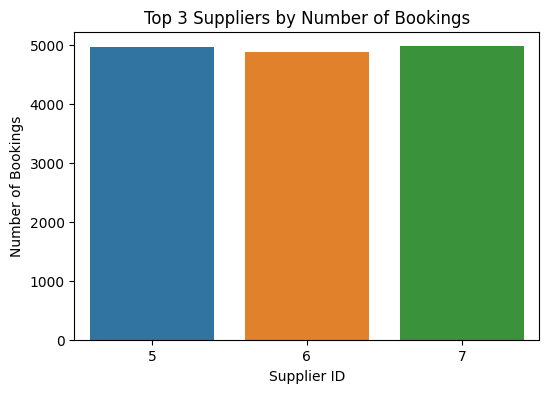

In [14]:
plt.figure(figsize=(6, 4))
sns.barplot(x=top_suppliers.index, y=top_suppliers.values)
plt.title('Top 3 Suppliers by Number of Bookings')
plt.xlabel('Supplier ID')
plt.ylabel('Number of Bookings')
plt.show()

In [15]:
same_airport_routes_count = df[df['from_airport'] == df['to_airport']].shape[0]
print(f"Number of routes where 'from_airport' and 'to_airport' are the same: {same_airport_routes_count}")

Number of routes where 'from_airport' and 'to_airport' are the same: 1713


Remove records where 'from_airport' and 'to_airport' are the same

In [16]:

df = df[df['from_airport'] != df['to_airport']]


print(f"Original DataFrame shape: {df.shape}")

Original DataFrame shape: (30527, 19)


Code for analysing avh profit margin

C:\Users\Admin\AppData\Local\Temp\ipykernel_11984\460720983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profit_margin'] = df['selling_price'] - df['costprice']
C:\Users\Admin\AppData\Local\Temp\ipykernel_11984\460720983.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['booking_date'] = pd.to_datetime(df['booking_date'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11984\460720983.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

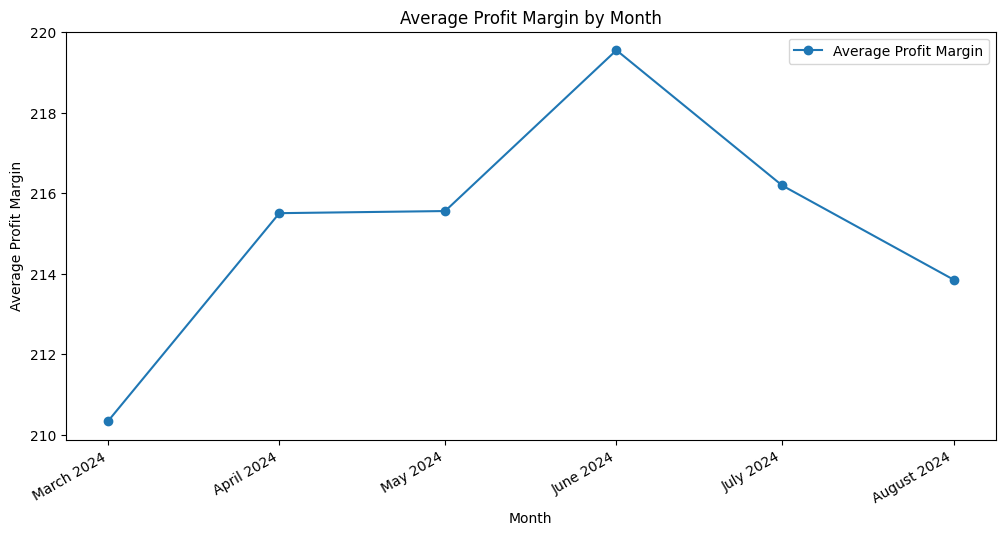

In [17]:
# Calculate the profit margin
df['profit_margin'] = df['selling_price'] - df['costprice']

# Convert booking_date to datetime format
df['booking_date'] = pd.to_datetime(df['booking_date'])

# Extract the year and month from the booking_date
df['year_month'] = df['booking_date'].dt.to_period('M')

# Calculate the average profit margin per month
monthly_profit_margin = df.groupby('year_month')['profit_margin'].mean().reset_index()

# Convert year_month back to datetime for plotting
monthly_profit_margin['year_month'] = monthly_profit_margin['year_month'].dt.to_timestamp()

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit_margin['year_month'], monthly_profit_margin['profit_margin'], label='Average Profit Margin', marker='o', linestyle='-')

# Format the x-axis labels to show 'Month Year'
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate and format date labels for better readability
plt.gcf().autofmt_xdate()

# Add titles and labels
plt.title('Average Profit Margin by Month')
plt.xlabel('Month')
plt.ylabel('Average Profit Margin')
plt.legend()

# Display the plot
plt.show()

Calculate correlation between markup and selling_price

Correlation between markup and selling_price: 0.83


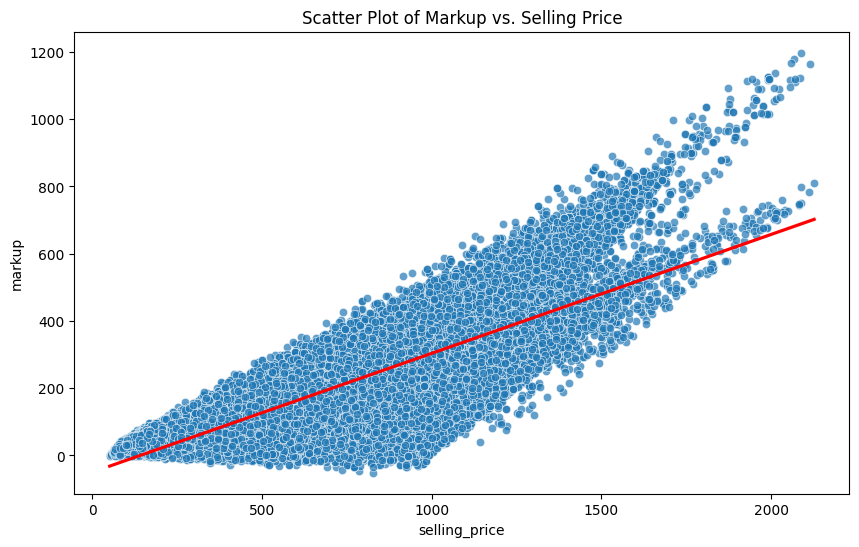

In [18]:

correlation, _ = pearsonr(df['markup'], df['selling_price'])
print(f"Correlation between markup and selling_price: {correlation:.2f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='selling_price', y='markup', data=df, alpha=0.7)
plt.title('Scatter Plot of Markup vs. Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Markup')

# Fit a regression line
sns.regplot(x='selling_price', y='markup', data=df, scatter=False, color='red')

plt.show()

Combine 'from_airport' and 'to_airport' to create a 'route' column

C:\Users\Admin\AppData\Local\Temp\ipykernel_11984\4172535596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['route'] = df['from_airport'] + ' - ' + df['to_airport']


Top 5 Most Popular Routes:
       Route  Number of Bookings
0  DEL - MAA                 140
1  BOM - DEL                 136
2  AMD - GOI                 136
3  HYD - CCU                 135
4  GOI - JAI                 135


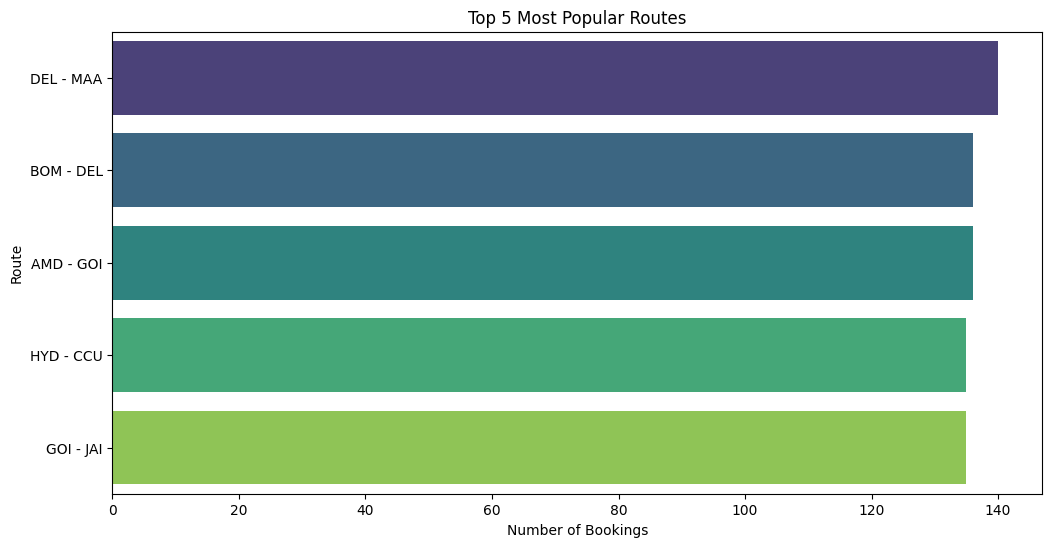

In [19]:

df['route'] = df['from_airport'] + ' - ' + df['to_airport']

# Count the frequency of each route
route_counts = df['route'].value_counts().reset_index()

# Rename the columns for better readability
route_counts.columns = ['Route', 'Number of Bookings']

# Display the top 10 most popular routes
print("Top 5 Most Popular Routes:")
print(route_counts.head(5))

# Visualize the top 10 most popular routes with a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Bookings', y='Route', data=route_counts.head(5), palette='viridis')
plt.title('Top 5 Most Popular Routes')
plt.xlabel('Number of Bookings')
plt.ylabel('Route')
plt.show()

List of the top 5 most popular routes

Journey Type Counts for Top 5 Most Popular Routes:
journey_type  one way  round trip
route                            
AMD - GOI          74          62
BOM - DEL          76          60
DEL - MAA          65          75
GOI - JAI          68          67
HYD - CCU          75          60


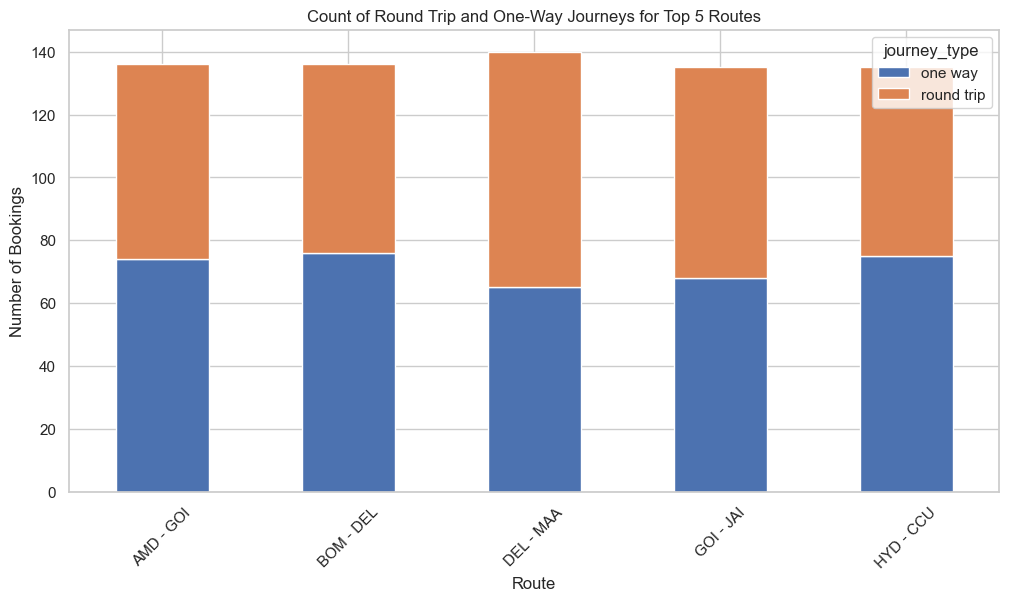

In [112]:

top_5_routes = ['DEL - MAA', 'HYD - CCU', 'GOI - JAI', 'BOM - DEL', 'AMD - GOI']

# Filter the dataset for only the top 5 routes
df_top_5_routes = df[df['route'].isin(top_5_routes)]

# Group by 'route' and 'journey_type' and count the occurrences
top_5_route_journey_counts = df_top_5_routes.groupby(['route', 'journey_type']).size().reset_index(name='count')

# Pivot the data to have 'round trip' and 'one way' as separate columns
top_5_route_journey_pivot = top_5_route_journey_counts.pivot(index='route', columns='journey_type', values='count').fillna(0)

# Convert the values to integers for readability
top_5_route_journey_pivot = top_5_route_journey_pivot.astype(int)

# Display the results for the top 5 routes
print("Journey Type Counts for Top 5 Most Popular Routes:")
print(top_5_route_journey_pivot)

# Plotting the data
top_5_route_journey_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Count of Round Trip and One-Way Journeys for Top 5 Routes')
plt.xlabel('Route')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

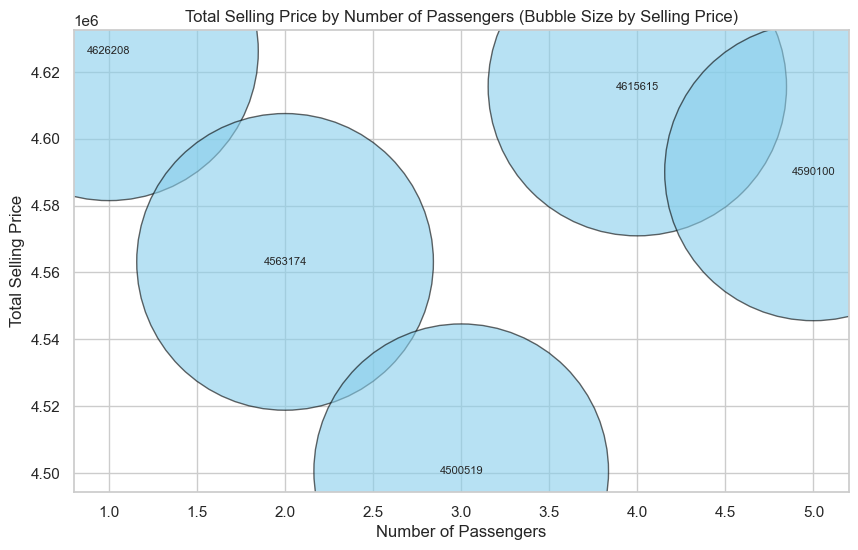

In [38]:


# Group by 'pax' and calculate the total sum of 'selling_price' for each group
total_selling_price_by_pax = df.groupby('pax')['selling_price'].sum().reset_index()

# Rename columns for clarity
total_selling_price_by_pax.columns = ['Number of Passengers', 'Total Selling Price']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(
    total_selling_price_by_pax['Number of Passengers'],  # X-axis: Number of Passengers
    total_selling_price_by_pax['Total Selling Price'],   # Y-axis: Total Selling Price
    s=total_selling_price_by_pax['Total Selling Price'] / 100,  # Bubble size scaled down
    alpha=0.6,  # Transparency for better visibility
    color='skyblue',  # Bubble color
    edgecolor='black'  # Border color of bubbles
)

# Adding labels and title
plt.xlabel('Number of Passengers')
plt.ylabel('Total Selling Price')
plt.title('Total Selling Price by Number of Passengers (Bubble Size by Selling Price)')

# Adding data labels for each bubble
for i in range(len(total_selling_price_by_pax)):
    plt.text(
        total_selling_price_by_pax['Number of Passengers'][i],  # X-coordinate
        total_selling_price_by_pax['Total Selling Price'][i],   # Y-coordinate
        round(total_selling_price_by_pax['Total Selling Price'][i], 2),  # Text
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        fontsize=8    # Font size
    )

# Display the plot
plt.show()

In [30]:
# Count the number of occurrences of each booking status
booking_status_counts = df['booking_status'].value_counts().reset_index()

# Rename columns for clarity
booking_status_counts.columns = ['Booking Status', 'Count']

# Display the results
print("Count of Booking Statuses:")
print(booking_status_counts)

Count of Booking Statuses:
  Booking Status  Count
0      confirmed  26903
1         failed   1850
2      cancelled   1774


In [31]:
# Filter data for failed and cancelled transactions
failed_cancelled_data = df[df['booking_status'].isin(['failed', 'cancelled'])]

# Analyze refunds
refund_analysis = failed_cancelled_data.groupby('booking_status')['refund_status'].value_counts().unstack(fill_value=0)

# Analyze payment methods and channels
payment_method_analysis = failed_cancelled_data.groupby('booking_status')['payment_method'].value_counts().unstack(fill_value=0)
channel_analysis = failed_cancelled_data.groupby('booking_status')['channel_of_booking'].value_counts().unstack(fill_value=0)

# Analyze refund amounts
refund_amount_analysis = failed_cancelled_data.groupby('booking_status')['refund_amount'].sum()

# Analyze cashback and coupon usage
cashback_analysis = failed_cancelled_data.groupby('booking_status')['cashback'].sum()
coupon_redeem_analysis = failed_cancelled_data.groupby('booking_status')['coupon_redeem'].sum()

# Display the results
print("Refund Status Analysis:")
print(refund_analysis)

print("\nPayment Method Analysis:")
print(payment_method_analysis)

print("\nChannel Analysis:")
print(channel_analysis)

print("\nTotal Refund Amount Analysis:")
print(refund_amount_analysis)

print("\nTotal Cashback Analysis:")
print(cashback_analysis)

print("\nTotal Coupon Redemption Analysis:")
print(coupon_redeem_analysis)

Refund Status Analysis:
refund_status    No   Yes
booking_status           
cancelled       406  1368
failed          386  1464

Payment Method Analysis:
payment_method  Bank Transfer  Credit Card  Debit Card  PayPal
booking_status                                                
cancelled                 459          461         412     442
failed                    410          550         436     454

Channel Analysis:
channel_of_booking  Android   Web  iOS
booking_status                        
cancelled               609  1066   99
failed                 1511    53  286

Total Refund Amount Analysis:
booking_status
cancelled    537980
failed       642704
Name: refund_amount, dtype: int32

Total Cashback Analysis:
booking_status
cancelled    13006
failed       13371
Name: cashback, dtype: int32

Total Coupon Redemption Analysis:
booking_status
cancelled    7160
failed       9436
Name: coupon_redeem, dtype: int32


<Figure size 1200x700 with 0 Axes>

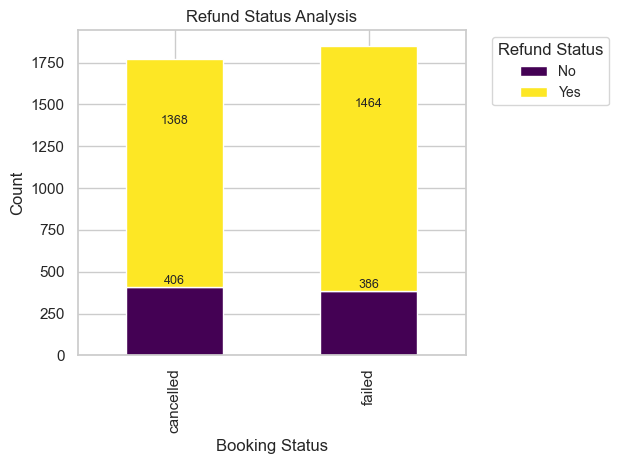

<Figure size 1200x700 with 0 Axes>

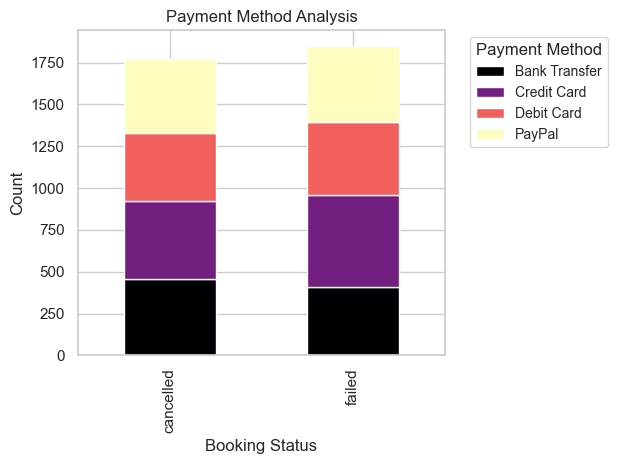

<Figure size 1200x700 with 0 Axes>

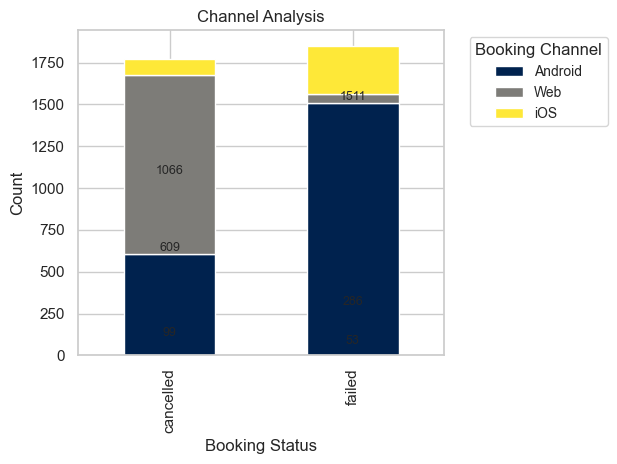

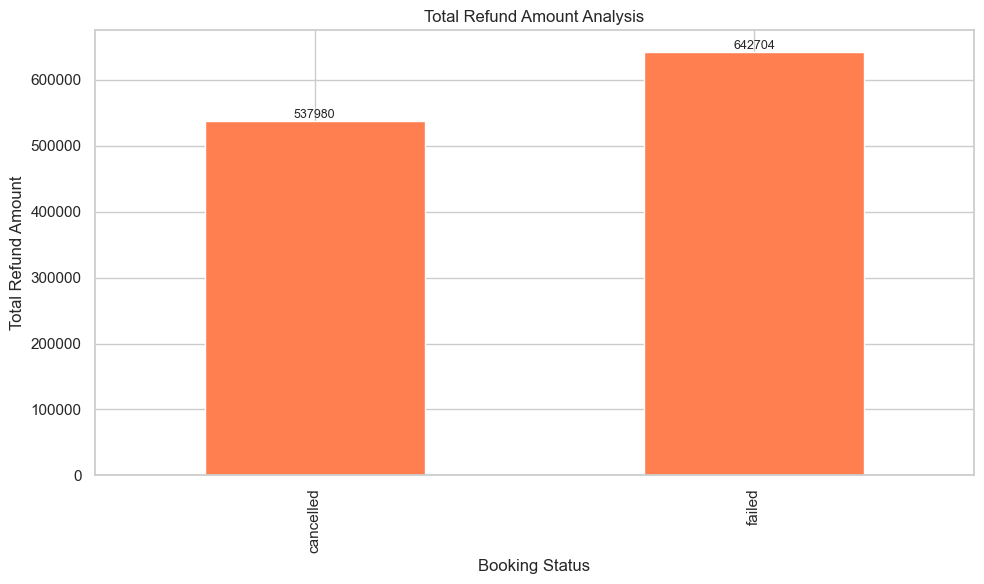

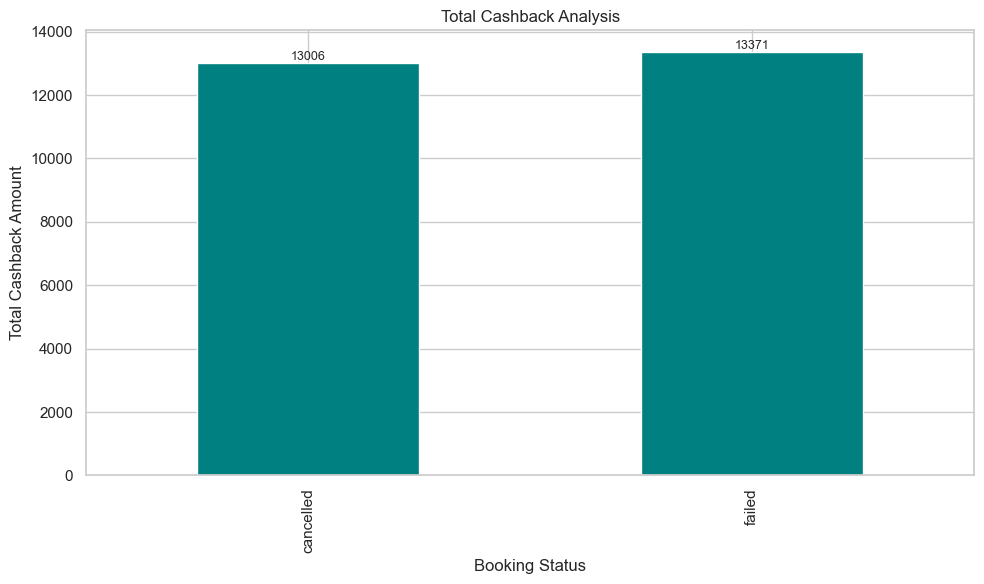

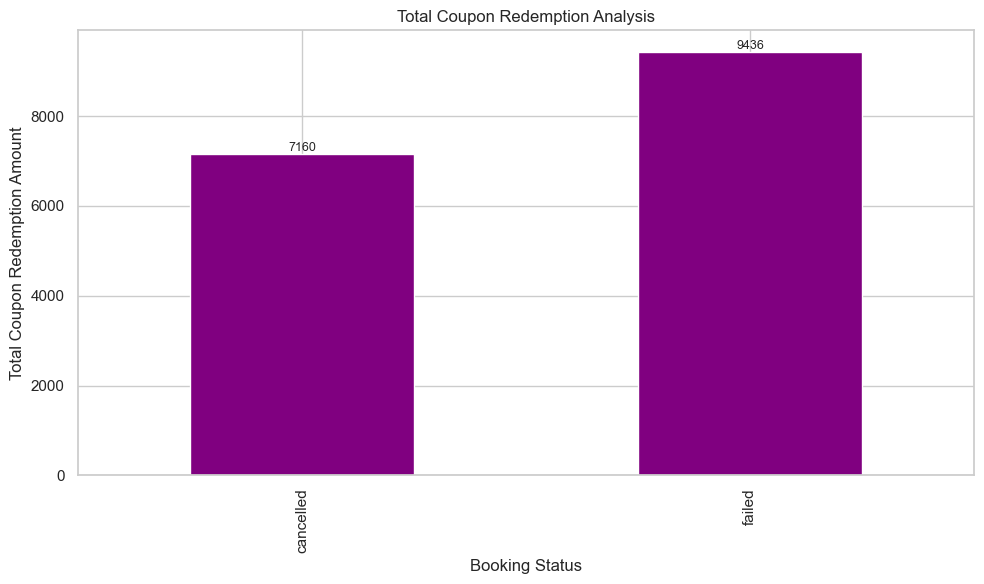

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set(style="whitegrid")

def add_data_labels(ax, data, position='outside'):
    """ Add data labels to the bars in the plot """
    for p in ax.patches:
        height = p.get_height()
        if position == 'outside':
            ax.text(p.get_x() + p.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=9)
        elif position == 'inside':
            ax.text(p.get_x() + p.get_width() / 2, height / 2, f'{height:.0f}', ha='center', va='center', fontsize=9, color='white')

# Plot Refund Status Analysis
plt.figure(figsize=(12, 7))
ax1 = refund_analysis.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Refund Status Analysis')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.legend(title='Refund Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
add_data_labels(ax1, refund_analysis)
plt.tight_layout()
plt.show()

# Plot Payment Method Analysis with improved data labels
plt.figure(figsize=(12, 7))
ax2 = payment_method_analysis.plot(kind='bar', stacked=True, colormap='magma')
plt.title('Payment Method Analysis')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
add_data_labels(ax2, payment_method_analysis, position='center') 
plt.tight_layout()
plt.show()

# Plot Channel Analysis
plt.figure(figsize=(12, 7))
ax3 = channel_analysis.plot(kind='bar', stacked=True, colormap='cividis')
plt.title('Channel Analysis')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.legend(title='Booking Channel', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
add_data_labels(ax3, channel_analysis)
plt.tight_layout()
plt.show()

# Plot Total Refund Amount Analysis
plt.figure(figsize=(10, 6))
ax4 = refund_amount_analysis.plot(kind='bar', color='coral')
plt.title('Total Refund Amount Analysis')
plt.xlabel('Booking Status')
plt.ylabel('Total Refund Amount')
add_data_labels(ax4, refund_amount_analysis)
plt.tight_layout()
plt.show()

# Plot Total Cashback Analysis
plt.figure(figsize=(10, 6))
ax5 = cashback_analysis.plot(kind='bar', color='teal')
plt.title('Total Cashback Analysis')
plt.xlabel('Booking Status')
plt.ylabel('Total Cashback Amount')
add_data_labels(ax5, cashback_analysis)
plt.tight_layout()
plt.show()

# Plot Total Coupon Redemption Analysis
plt.figure(figsize=(10, 6))
ax6 = coupon_redeem_analysis.plot(kind='bar', color='purple')
plt.title('Total Coupon Redemption Analysis')
plt.xlabel('Booking Status')
plt.ylabel('Total Coupon Redemption Amount')
add_data_labels(ax6, coupon_redeem_analysis)
plt.tight_layout()
plt.show()